
#**PE07 Training Deep Learning models**
####The objective of this programming exercise is to apply the concepts covered in Module 7 - Chapter 11 Training Deep Learning Models.
####We will start with a basic DNN model and make performance improvements by 1) changing the activation function, 2) using batch normalization, and 3) using dropout
###Finally, we will create our own model using everything we learned.

####The dataset is the MNIST image dataset and we will classify 10 classes


#**Imports and Helper function**

In [1]:
# Imports and formatting the data
# See previous lab if this is confusing
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# function to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

#**Starter model**
###Note that the model is built by adding dense layers in a loop

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1

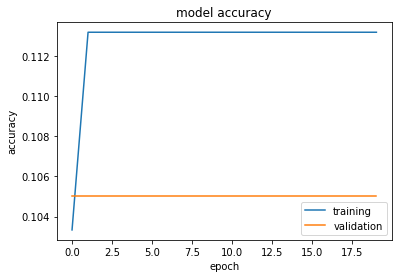

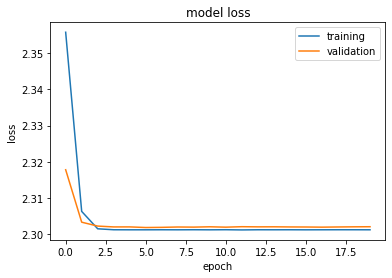

Test loss: 2.3
Test accuracy: 0.113


In [2]:
model = Sequential()
model.add(Dense(units=10, activation='sigmoid', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=10, activation='sigmoid'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

In [3]:
#Question #1
#What is the test accuracy of the starter model? Test accuracy: 0.113

In [4]:
#Question #2
#Why is the accuracy of the starter model so poor?
"""
Loss can be seen as a distance between the true values of the problem and the values predicted by the model. If the training accuracy of model is low, it's an indication that current model configuration can't capture the complexity of data

"""

"\nLoss can be seen as a distance between the true values of the problem and the values predicted by the model. If the training accuracy of model is low, it's an indication that current model configuration can't capture the complexity of data\n\n"

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

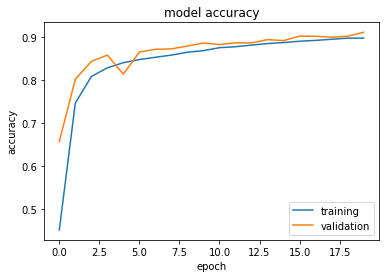

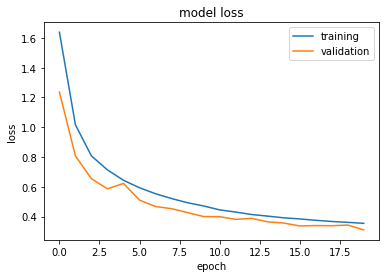

Test loss: 0.352
Test accuracy: 0.901


In [5]:
#Question #3
#Rewrite the code of the starter model so that it uses the ReLU activation function instead of the sigmoid function. Show your code in the less below and rerun the training.

model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=10, activation='relu'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)


In [6]:
#Question #4
#What is the test accuracy of the model using ReLU activation? Comment on the results: Is it better or worse than the previous model? Test accuracy: 0.901

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_30 (Dense)             (None, 10)               

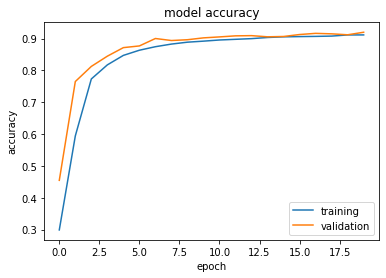

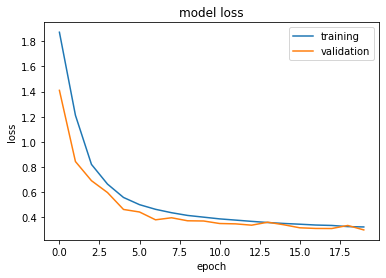

Test loss: 0.351
Test accuracy: 0.905


In [7]:
#Question #5
#Rewrite the code of the starter model so that it uses a leaky ReLU activation function (alpha = 0.01) instead of the sigmoid function. Show your code in the less below and rerun the training.
model = Sequential()
leaky_relu =(LeakyReLU(alpha=0.01))
model.add(Dense(units=10, activation=leaky_relu, input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=10, activation=leaky_relu))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

In [8]:
#Question #6
#What is the test accuracy of the model using leaky ReLU activation? Comment on the results: Is it better or worse than previous models? Test accuracy: 0.905

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_37 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_38 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_39 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_40 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_41 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_42 (Dense)             (None, 10)               

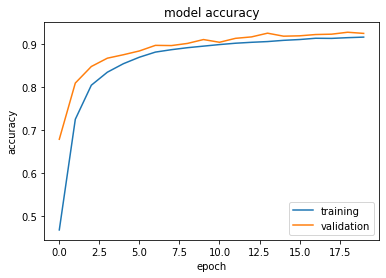

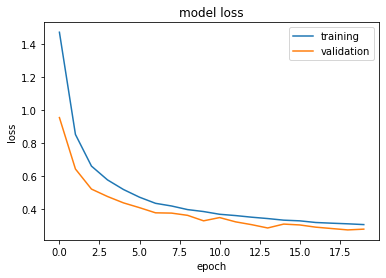

Test loss: 0.316
Test accuracy: 0.914


In [9]:
#Question #7
#Rewrite the code of the starter model so that it uses the ELU activation function instead of the sigmoid function. Show your code in the less below and rerun the training.

model = Sequential()
model.add(Dense(units=10, activation='elu', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=10, activation='elu'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

In [10]:
#Question #8
#What is the test accuracy of the model using ELU activation? Comment on the results: Is it better or worse than previous models?Test accuracy: 0.914

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 10)                7850      
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_49 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_50 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_51 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_52 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_53 (Dense)             (None, 10)               

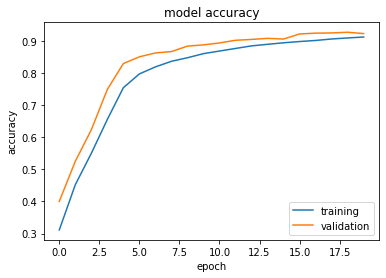

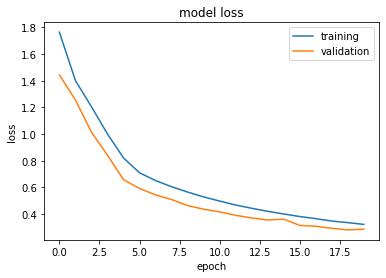

Test loss: 0.348
Test accuracy: 0.906


In [11]:
#Question #9
#Rewrite the code of the starter model so that it uses your choice of activation function instead of the sigmoid function. 
#Insert a layer of batch normalization after each dense layer
#Show your code in the less below and rerun the training.

from tensorflow.keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(units=10, activation='elu', input_shape=(image_size,)))
model.add(BatchNormalization())
for _ in range(10):
    model.add(Dense(units=10, activation='elu'))
    

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)


In [12]:
#Question #10
#What is the test accuracy of the model using batch normalization ? Comment on the results: Is it better or worse than previous models? Test accuracy: 0.906

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 10)                7850      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_62 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_63 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_64 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_65 (Dense)             (None, 10)               

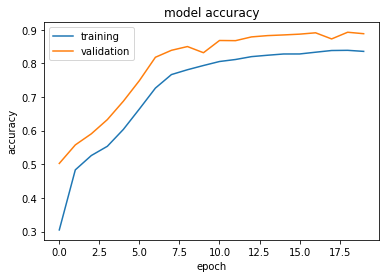

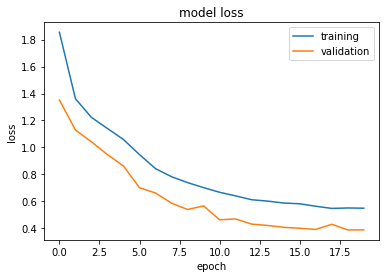

Test loss: 0.43
Test accuracy: 0.876


In [13]:
#Question #11
#Rewrite the code of the starter model so that it uses your choice of activation function instead of the sigmoid function. 
#Insert a layer with 20% dropout after each dense layer
#Show your code in the less below and rerun the training.
from tensorflow.keras.layers import Dropout
model = Sequential()

model.add(Dense(units=10, activation='elu', input_shape=(image_size,)))
model.add(Dropout(0.1))
for _ in range(10):
    model.add(Dense(units=10, activation='elu'))
    

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)


In [14]:
#Question #12
#What is the test accuracy of the model using dropout layers ? Comment on the results: Is it better or worse than previous models? Test accuracy: 0.876

##**Your own customized model**

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_73 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_74 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_75 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_76 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_77 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_78 (Dense)             (None, 10)               

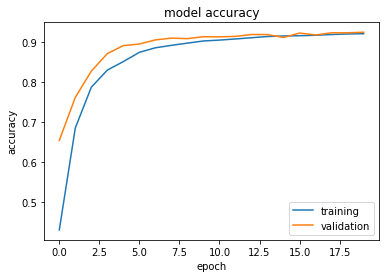

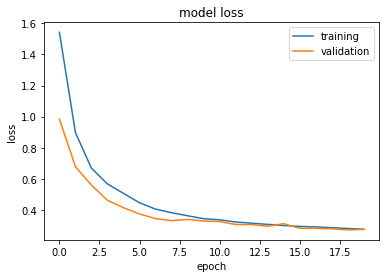

Test loss: 0.308
Test accuracy: 0.915


In [15]:
#Question #13
#your turn to improvise
#given the results from the previous models and what you learned in chapter 11, create and train your own model and comment on its performance
#feel free to change the optimizer and anything else you see fit
#Make sure to detail and justify the parameters you selected for your model.
#Show your code below
model = Sequential()

model.add(Dense(units=10, activation='relu', input_shape=(image_size,)))
for _ in range(10):
    model.add(Dense(units=10, activation='relu'))
    

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
#to train the neural network in less time and more efficiently than Adam is the optimizer
model.summary()

#Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)